# In-class assignment: Build a classifier model

## Objective:

Students will:

- Develop and train a classification model using a provided training/validation dataset.
- Save their trained models as pickle files.
- Submit their models for evaluation.
- Compete to achieve the highest F1 score on a hidden test dataset.

### Step 1: Load the Dataset
Instructions for Students:
- Load the dataset from scikit-learn.
- Explore the dataset to understand its structure and key characteristics.

In [1]:
# Load dataset from scikit-learn
from sklearn import datasets

# load iris dataset
iris = datasets.load_iris()


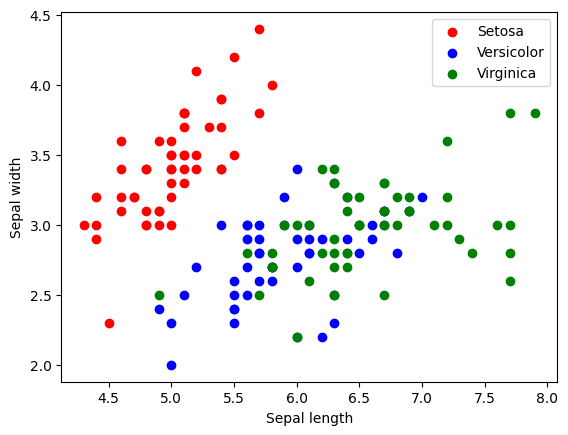

In [2]:
# visualize the data
import matplotlib.pyplot as plt

# get the first two features
X = iris.data[:, :2]
y = iris.target

# plot the data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Versicolor')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='green', label='Virginica')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.legend()
plt.show()

### Step 2: Normalize the Features (if necessary)
Instructions for Students:

- If the dataset contains numerical features, normalize the features using a normalization technique.
- If the dataset contains categorical features, encode the categorical features using an encoding technique.
- Split the dataset into training and validation sets.

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


# Normalize numerical features
scaler = StandardScaler() # You can also use MinMaxScaler, RobustScaler, etc. check https://scikit-learn.org/stable/modules/preprocessing.html
X_norm = scaler.fit_transform(X)


# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42) # 80% training, 20% validation data (you can change the split ratio)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_test.shape)




Training set shape: (120, 2)
Validation set shape: (30, 2)


### Step 3: Hyperparameter Tuning and Model Training
Instructions for Students:

- Choose a classification model (e.g., Logistic Regression, Random Forest, Gradient Boosting, etc.) and train it on the training dataset.
- Decide on the hyperparameters for the model and perform hyperparameter tuning using the training dataset.
- Train the model using the training dataset and evaluate its performance on the validation dataset.
- Save the trained model as a pickle file.

In [5]:

# Import the classifier from the sklearn library
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
# or
# from sklearn.linear_model import LogisticRegression
# or
# from sklearn.svm import SVC
# or
# from sklearn.tree import DecisionTreeClassifier

# Import the GridSearchCV or RandomizedSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV



# Define the hyperparameters to tune and their possible values as a dictionary (param_grid)
param_grid = {
    'n_estimators': [100, 200, 300],
    # this is to show format, you can add more hyperparameters

}

# Create the model
clf = RandomForestClassifier() # Your classifier here, e.g. RandomForestClassifier(), DecisionTreeClassifier(), LogisticRegression(), etc.

# Randomized search, you can also use GridSearchCV instead however RandomizedSearchCV is faster, GridSearchCV is exhaustive search over a specified parameter values
# You may adjust n_iter, cv, and verbose parameters as needed
# n_iter: Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
# cv: Determines the cross-validation splitting strategy. None, to use the default 3-fold cross validation.
# verbose: Controls the verbosity: the higher, the more messages.
clf_opt = RandomizedSearchCV(estimator=clf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# clf_opt = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit the model

clf_opt.fit(X_train, y_train)

# print the best parameters
print("Best parameters:", clf_opt.best_params_)






Fitting 3 folds for each of 3 candidates, totalling 9 fits


/workspace/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 3 is smaller than n_iter=100. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=100; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.1s
[CV] END ...................................n_estimators=200; total time=   0.1s
[CV] END ...................................n_estimators=300; total time=   0.1s
[CV] END ...................................n_estimators=300; total time=   0.1s
[CV] END ...................................n_estimators=300; total time=   0.1s
Best parameters: {'n_estimators': 100}


In [7]:
# Make predictions
y_pred = clf_opt.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


# if you are not satisfied with the model, you can retrain the model with different hyperparameters or try a different model

# If you are satisfied with the model, you can save it for later use 
import joblib
joblib.dump(clf_opt, 'model.pkl')


Accuracy: 0.8

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.67      0.67         9
           2       0.73      0.73      0.73        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30


Confusion Matrix:
 [[10  0  0]
 [ 0  6  3]
 [ 0  3  8]]


['model.pkl']

## Useful Links:
- [Scikit-learn datasets](https://scikit-learn.org/1.5/api/sklearn.datasets.html)
- [Scikit-learn preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html)
- [Scikit-learn model selection](https://scikit-learn.org/stable/model_selection.html)
- [Scikit-learn classifiers](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)



